In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os

In [3]:
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to read image from path: {image_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    normalized = img_rgb.astype(float) / 255.0

    return normalized, img_rgb


In [4]:
def detect_hottest_spot(image, n_clusters=5):
    pixels = image.reshape((-1, 3))

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(pixels)
    cluster_heat = np.sum(kmeans.cluster_centers_, axis=1)
    hottest_cluster = np.argmax(cluster_heat)

    mask = (kmeans.labels_ == hottest_cluster).reshape(image.shape[:2])

    heat_map = np.sum(image, axis=2)
    y, x = np.unravel_index(np.argmax(heat_map * mask), heat_map.shape)

    return x, y

In [5]:
def get_image_dimensions(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

In [6]:
def calculate_x_angle(x, image_width, num_segments=10, angle_range=(30, 180)):
    angle_range = np.linspace(angle_range[0], angle_range[1], num_segments)
    segment_width = image_width / num_segments
    segment_index = int(x // segment_width)
    angle = angle_range[segment_index]

    return angle

In [7]:
def calculate_y_angle(y, image_height, num_segments=12, angle_range=(0, 90)):
    angle_range = np.linspace(angle_range[0], angle_range[1], num_segments)
    segment_height = image_height / num_segments
    segment_index = int(y // segment_height)
    angle = angle_range[segment_index]

    return angle

In [8]:
def send_angle_to_nodemcu(angle, nodemcu_ip):
    try:
        response = requests.post(f'http://{nodemcu_ip}', data={'angle': angle})
        if response.status_code == 200:
            print("Angle sent successfully")
        else:
            print("Failed to send angle")
    except requests.RequestException as e:
        print(f"Error sending angle to NodeMCU: {e}")


In [9]:
!pip install pyserial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.5 MB/s eta 0:00:00


In [10]:
import serial
import time

def send_angles_to_arduino(x_angle, y_angle, port="/dev/cu.usbserial-10", baudrate=9600):
    try:
        with serial.Serial(port, baudrate, timeout=1) as ser:
            angle_data = f"{x_angle},{y_angle}\n"
            ser.write(angle_data.encode())
            print(f"Sent angles to Arduino: {angle_data.strip()}")
            time.sleep(2)
    except serial.SerialException as e:
        print(f"Error communicating with Arduino: {e}")

In [11]:
def main(image_path):
    try:
        normalized_img, original_img = preprocess_image(image_path)
        x, y = detect_hottest_spot(normalized_img)
        image_width, image_height = get_image_dimensions(image_path)
        x_angle = calculate_x_angle(x, image_width)
        y_angle = calculate_y_angle(y, image_height)

        plt.imshow(original_img)
        plt.plot(x, y, 'r+', markersize=20, linewidth=2)
        plt.title("Hottest Spot Detection")
        plt.show()

        print(f"Hottest spot detected at coordinates: ({x}, {y})")
        print(f"The angle of the sun on x-axis is: {x_angle}°")
        print(f"The angle of the sun on y-axis is: {y_angle}°")

        nodemcu_ip = "192.168.35.228"
        # send_angle_to_nodemcu(x_angle, nodemcu_ip)
        # send_angle_to_nodemcu(y_angle, nodemcu_ip)

        send_angles_to_arduino(x_angle, y_angle, port="/dev/cu.usbserial-10")

    except Exception as e:
        print(f"An error occurred: {e}")

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


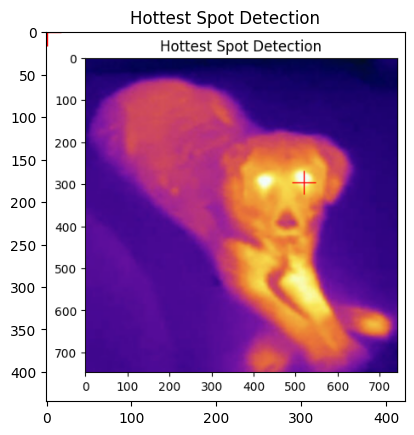

Hottest spot detected at coordinates: (0, 0)
The angle of the sun on x-axis is: 30.0°
The angle of the sun on y-axis is: 0.0°
Error communicating with Arduino: [Errno 2] could not open port /dev/cu.usbserial-10: [Errno 2] No such file or directory: '/dev/cu.usbserial-10'


In [13]:
image_path = "/content/drive/MyDrive/Personal/image-segmentation/test_images/image1.png"
main(image_path)

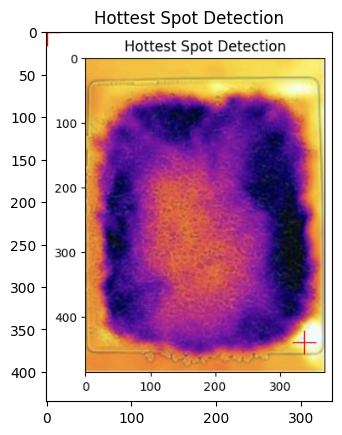

Hottest spot detected at coordinates: (0, 0)
The angle of the sun on x-axis is: 30.0°
The angle of the sun on y-axis is: 0.0°
Error communicating with Arduino: [Errno 2] could not open port /dev/cu.usbserial-10: [Errno 2] No such file or directory: '/dev/cu.usbserial-10'


In [14]:
image_path = "/content/drive/MyDrive/Personal/image-segmentation/test_images/image2.png"
main(image_path)

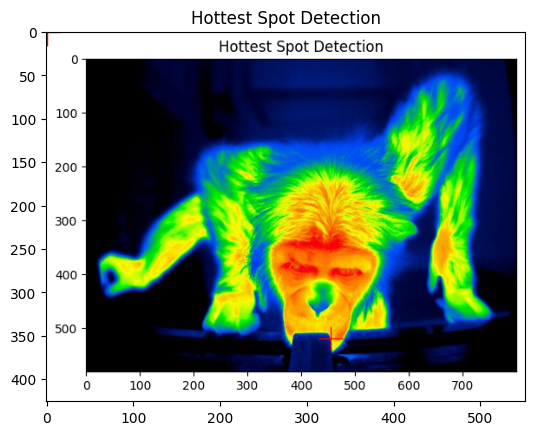

Hottest spot detected at coordinates: (0, 0)
The angle of the sun on x-axis is: 30.0°
The angle of the sun on y-axis is: 0.0°
Error communicating with Arduino: [Errno 2] could not open port /dev/cu.usbserial-10: [Errno 2] No such file or directory: '/dev/cu.usbserial-10'


In [15]:
image_path = "/content/drive/MyDrive/Personal/image-segmentation/test_images/image3.png"
main(image_path)

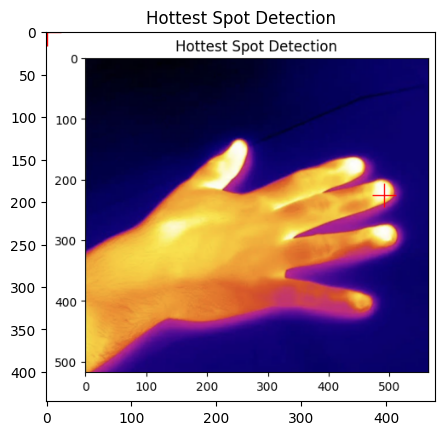

Hottest spot detected at coordinates: (0, 0)
The angle of the sun on x-axis is: 30.0°
The angle of the sun on y-axis is: 0.0°
Error communicating with Arduino: [Errno 2] could not open port /dev/cu.usbserial-10: [Errno 2] No such file or directory: '/dev/cu.usbserial-10'


In [16]:
image_path = "/content/drive/MyDrive/Personal/image-segmentation/test_images/image4.png"
main(image_path)

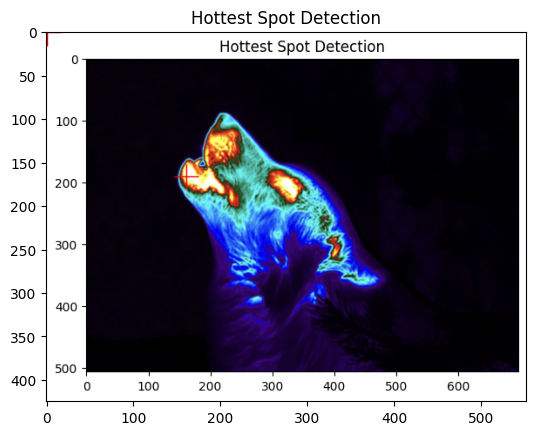

Hottest spot detected at coordinates: (0, 0)
The angle of the sun on x-axis is: 30.0°
The angle of the sun on y-axis is: 0.0°
Error communicating with Arduino: [Errno 2] could not open port /dev/cu.usbserial-10: [Errno 2] No such file or directory: '/dev/cu.usbserial-10'


In [17]:
image_path = "/content/drive/MyDrive/Personal/image-segmentation/test_images/image5.png"
main(image_path)